<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/faces_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

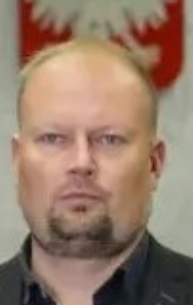

In [4]:
import os
from IPython.display import display, Image, clear_output
import ipywidgets as widgets

# 1. Ścieżka do katalogu z obrazami
images_dir = "Images"
images = [f for f in os.listdir(images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# 2. Tablica do przechowywania odpowiedzi
responses = []

# 3. Funkcja do wyświetlania jednego obrazu z checkboxami
def display_image(index):
    if index >= len(images):
        clear_output()
        print("Koniec! Wszystkie odpowiedzi zapisane:")
        print(responses)
        return

    clear_output()
    # Wyświetl obraz
    image_path = os.path.join(images_dir, images[index])
    display(Image(image_path))

    # Checkboxy z opcjami
    options = ["Zlosc", "Smutek", "Radosc", "Gniew"]
    checkboxes = [widgets.Checkbox(description=opt) for opt in options]

    # Przycisk "Dalej"
    button = widgets.Button(description="Dalej")

    def on_button_click(b):
        # Zapisz odpowiedzi dla aktualnego obrazu
        current_responses = [checkbox.description for checkbox in checkboxes if checkbox.value]
        responses.append({images[index]: current_responses})
        # Przejdź do następnego obrazu
        display_image(index + 1)

    button.on_click(on_button_click)

    # Wyświetl checkboxy i przycisk
    display(widgets.VBox(checkboxes + [button]))

# 4. Rozpocznij od pierwszego obrazu
display_image(0)
